In [213]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
import numpy.ma as ma
from numpy import nan
import matplotlib.font_manager

In [214]:
dv = pd.read_csv('Element_profiles_RioBlanco.csv')
df = dv.replace(['<0.02','<0.01','<0.05','<0.002','<0.5', '<1'],'0') #plot below detection limits as zero
df = df.replace('#VALUE!', np.NaN)

### Notebook contents:

    -CIA for soils above vs. below the knickpoint and the LG1 profile
    -La/Y ratios for soils above vs. below the knickpoint and the LG1 profile
    -Li concentrations for soils above vs. below the knickpoint

### Part 1. Chemical Index of Alteration  (extent of weathering)

In [305]:
SabLL = df.iloc[1:6,1:76]
R191 = df.iloc[6:9,1:76]
T1OX = df.iloc[9:14,1:76]
IC_A11 = df.iloc[14:19,1:76]
IC_A13 = df.iloc[19:24,1:76]
IC_A12 = df.iloc[24:32,1:76]
IC_B13 = df.iloc[32:36,1:76]
RB_B11 = df.iloc[36:38,1:76]
IC_B5 = df.iloc[38:40, 1:76]
RB_B12 = df.iloc[40:42, 1:76]
US01 = df.iloc[42:47, 1:76]
US02 = df.iloc[47:53, 1:76]
US03 = df.iloc[53:64, 1:76]
LG1 = df.iloc[64:94, 1:76]

In [306]:
AKP = pd.concat([SabLL, R191, T1OX, IC_A11, IC_A12, IC_A13])
BKP = pd.concat([RB_B11, IC_B5, RB_B12, US01, US02, US03])
cia_a = AKP['CIA'].astype(float)
cia_b = BKP['CIA'].astype(float)
depth_a = AKP['depth'].astype(float)
depth_b = BKP['depth'].astype(float)
cia_lg = LG1['CIA'].astype(float)
depth_lg = LG1['depth'].astype(float)
lg_depth = [m*100 for m in depth_lg]

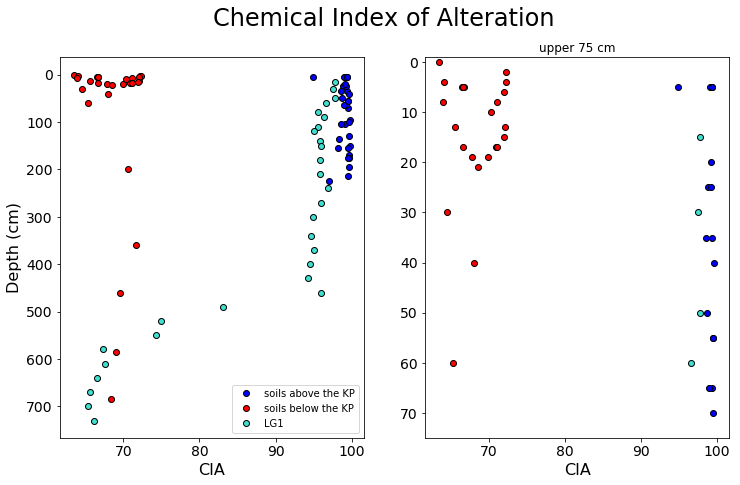

In [307]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax.plot(cia_a, depth_a, 'bo', linestyle='', label='soils above the KP', markeredgecolor=('k'))
ax.plot(cia_b, depth_b, 'ro', linestyle='', label='soils below the KP', markeredgecolor=('k'))
ax.plot(cia_lg, lg_depth, marker='o', linestyle='', label='LG1', markeredgecolor=('k'), color='turquoise')
ax.set_ylabel('Depth (cm)')
ax.set_xlabel('CIA')
ax.invert_yaxis()
ax.legend(loc='lower right')

ax1.plot(cia_a, depth_a, 'bo', linestyle='', label='soils above the KP', markeredgecolor=('k'))
ax1.plot(cia_b, depth_b, 'ro', linestyle='', label='soils below the KP', markeredgecolor=('k'))
ax1.plot(cia_lg, lg_depth, marker='o', linestyle='', label='LG1', markeredgecolor=('k'), color='turquoise')
ax1.set_xlabel('CIA')
ax1.set_ylim(-1,75)
ax1.invert_yaxis()
ax1.set_title('upper 75 cm')
#ax1.legend(loc='lower right')


plt.suptitle('Chemical Index of Alteration', fontsize=24)
plt.show()

### Part 2. La/Y ratios (dust contributions)

In [333]:
ratio_label = r'$\frac{La_N}{Y_N}$'

In [334]:
la_akp = AKP['La'].astype(float)
rock_la = 4 #bedrock concentration in ug/g
la_akp = [x / rock_la for x in la_akp]

rey_akp = AKP['Y'].astype(float)
rock_rey = 22 #bedrock concentration in ug/g
rey_akp = [i / rock_rey for i in rey_akp]

In [342]:
la_bkp = BKP['La'].astype(float)
rock_la = 4 #bedrock concentration in ug/g
la_bkp = [x / rock_la for x in la_bkp]

rey_bkp = BKP['Y'].astype(float)
rock_rey = 22 #bedrock concentration in ug/g
rey_bkp = [i / rock_rey for i in rey_bkp]

In [343]:
ratio_akp = [g/f for g, f in zip(la_akp, rey_akp)]
ratio_bkp = [g/f for g, f in zip(la_bkp, rey_bkp)]

In [357]:
ratio_akp = pd.Series(ratio_akp)
AKP['la_rey'] = ratio_akp #add ratios to df
AKPn = AKP[(AKP.T != 0).all()] #drop values below detection limit

BKP = BKP.reset_index()
ratio_bkp = pd.Series(ratio_bkp)
BKP['la_rey'] = ratio_bkp
BKPn = BKP[(BKP.T !=0).all()]

In [359]:
#assign variables for the graph
akp_x = AKPn['la_rey']
akp_y = AKPn['depth']

bkp_x = BKPn['la_rey']
bkp_y = BKPn['depth']

In [360]:
#Guaba Ridge
LG1 = pd.read_csv('LG1_ratio_n.csv').dropna()
LG1_ratio = LG1['La/Y']
LG1_depth = LG1['Depth'].astype(float)
lg_depth = [h*100 for h in LG1_depth]

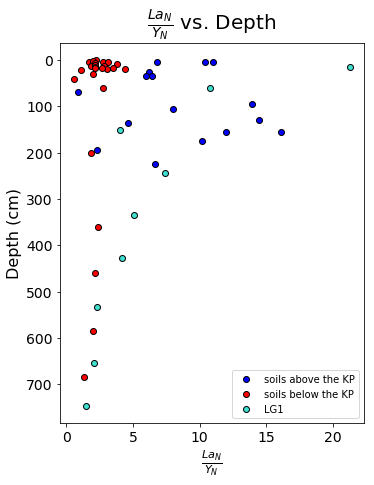

In [364]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(121)

ax.plot(akp_x, akp_y, 'bo', linestyle='', label='soils above the KP', markeredgecolor=('k'))
ax.plot(bkp_x, bkp_y, 'ro', linestyle='', label='soils below the KP', markeredgecolor=('k'))
ax.plot(LG1_ratio, lg_depth, marker='o', linestyle='', label='LG1', markeredgecolor=('k'), color='turquoise')
ax.set_ylabel('Depth (cm)')
ax.set_xlabel(ratio_label)
ax.invert_yaxis()
ax.legend(loc='lower right')

plt.title(r'$\frac{La_N}{Y_N}$ vs. Depth',fontsize=20, y=1.02)
plt.show()

#### Summary:

    -La/Y ratios are shown here as approximations of the enrichment in LREE in the surface horizons from dust inputs. 
    -The profile from LG1 shows dust deposition, and cycling of dust in the soil profiles, influence the La/Y ratio until 
     5 meters depth. 
    -There is a clear distinction between the La/Y ratios in the soils above vs. below the knickpoint. 
    -This plot implies that dust deposition and cycling is less detectable in the soils from below the knickpoint, 
     consistent with out expectations from the higher erosion rates.

### Part 3. Li abundances (potential for isotopic analysis)

In [369]:
li_akp = AKP['Li'].astype(float)
li_bkp = BKP['Li'].astype(float)
li_a_y = AKP['depth'].astype(float)
li_b_y = BKP['depth'].astype(float)

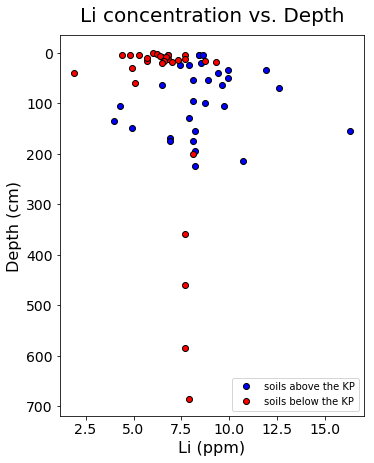

In [371]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(121)

ax.plot(li_akp, li_a_y, 'bo', linestyle='', label='soils above the KP', markeredgecolor=('k'))
ax.plot(li_bkp, li_b_y, 'ro', linestyle='', label='soils below the KP', markeredgecolor=('k'))
ax.set_ylabel('Depth (cm)')
ax.set_xlabel('Li (ppm)')
ax.invert_yaxis()
ax.legend(loc='lower right')

plt.title('Li concentration vs. Depth',fontsize=20, y=1.02)
plt.show()